# 数据可视化之小提琴图

数据来源于天池赛题：零基础入门数据挖掘 - 二手车交易价格预测

地址：https://tianchi.aliyun.com/competition/entrance/231784/introduction?spm=5176.12281957.1004.1.38b02448ausjSX


## 一、原理介绍

小提琴图（violin plot）顾名思义，就是外形像小提琴的一种图。这种图用来显示数据的分布和概率密度，可以看成是箱线图和密度图的结合。小提琴图的中间部分反映箱线图的信息，图的两侧反映出密度图的信息。小提琴图常用于建模前的EDA数据探索性分析环节。

下面对小提琴图所反映的信息做一个总结：

1. 分布信息
 * 小提琴图中间的黑色粗条用来显示四分位数。黑色粗条中间的白点表示中位数，粗条的顶边和底边分别表示上四分位数和下四分位数，通过边的位置所对应的y轴的数值就可以看到四分位数的值。
 * 由黑色粗条延伸出的黑细线表示95%的置信区间。

2. 概率密度信息
 * 从小提琴图的外形可以看到任意位置的数据密度，实际上就是旋转了90度的密度图。
 * 小提琴图越宽，表示密度越大。
 * 可以展示出数据的多个峰值。

## 二、代码实现

In [17]:
#加载需要的模块
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#导入数据
Train_data = pd.read_csv('F:/data/used_car_train_20200313.csv', sep=' ')

In [19]:
Train_data['gearbox'].value_counts() #对分类变量的类别进行计数

0.0    111623
1.0     32396
Name: gearbox, dtype: int64

In [20]:
#后面将研究不同类型的'gearbox'对应'price'的差异
x=Train_data['gearbox']
y=Train_data['price'] #在原数据集中，'price'为目标变量

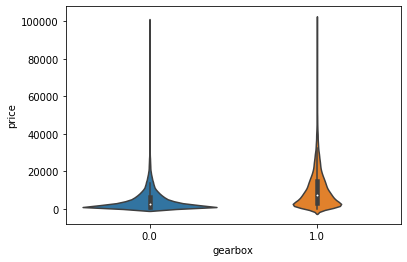

In [21]:
sns.violinplot(x=x,y=y,data=Train_data) #在sns.violinplot中，x是类别变量，y是数值型变量，data用于指定数据集

## 三、结果解读

* 从上面的小提琴图可以看出，不同的变速箱类别对应的二手车价格是不同的。当变速箱类别为1时，汽车价格相对更高。在建模的过程中，往往这种差异性较大的变量对于建模的效果更好，因此可以初步筛选出'gearbox'作为后面模型的输入变量。
* 从分布情况来看，'price'极度右偏。由于目标变量不符合正态分布，在进行回归之前，需要对其进行转换，采用的转换方法有取对数和拟合无界约翰逊分布。